In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/pgaTourData.csv")
print(df.head())

      Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0  Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1     Ryan Armour   109.0               73.58  2018         283.5  68.22   
2     Chez Reavie    93.0               72.24  2018         286.5  68.67   
3      Ryan Moore    78.0               71.94  2018         289.2  68.80   
4    Brian Stuard   103.0               71.44  2018         278.9  67.12   

   Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
0          29.93               60.67         69.617    868   NaN     5.0   
1          29.31               60.13         70.758  1,006   1.0     3.0   
2          29.12               62.27         70.432  1,020   NaN     3.0   
3          29.17               64.16         70.015    795   NaN     5.0   
4          29.11               59.23         71.038    421   NaN     3.0   

   Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
0         

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [15]:
df.shape

(2312, 18)

In [16]:
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)
# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)

# Remove the $ and commas in money 
df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
df['Money'] = df['Money'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1674 non-null   object 
 1   Rounds              1674 non-null   int64  
 2   Fairway Percentage  1674 non-null   float64
 3   Year                1674 non-null   int64  
 4   Avg Distance        1674 non-null   float64
 5   gir                 1674 non-null   float64
 6   Average Putts       1674 non-null   float64
 7   Average Scrambling  1674 non-null   float64
 8   Average Score       1674 non-null   float64
 9   Points              1674 non-null   int64  
 10  Wins                1674 non-null   int64  
 11  Top 10              1674 non-null   int64  
 12  Average SG Putts    1674 non-null   float64
 13  Average SG Total    1674 non-null   float64
 14  SG:OTT              1674 non-null   float64
 15  SG:APR              1674 non-null   float64
 16  SG:ARG

In [19]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [20]:
df.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


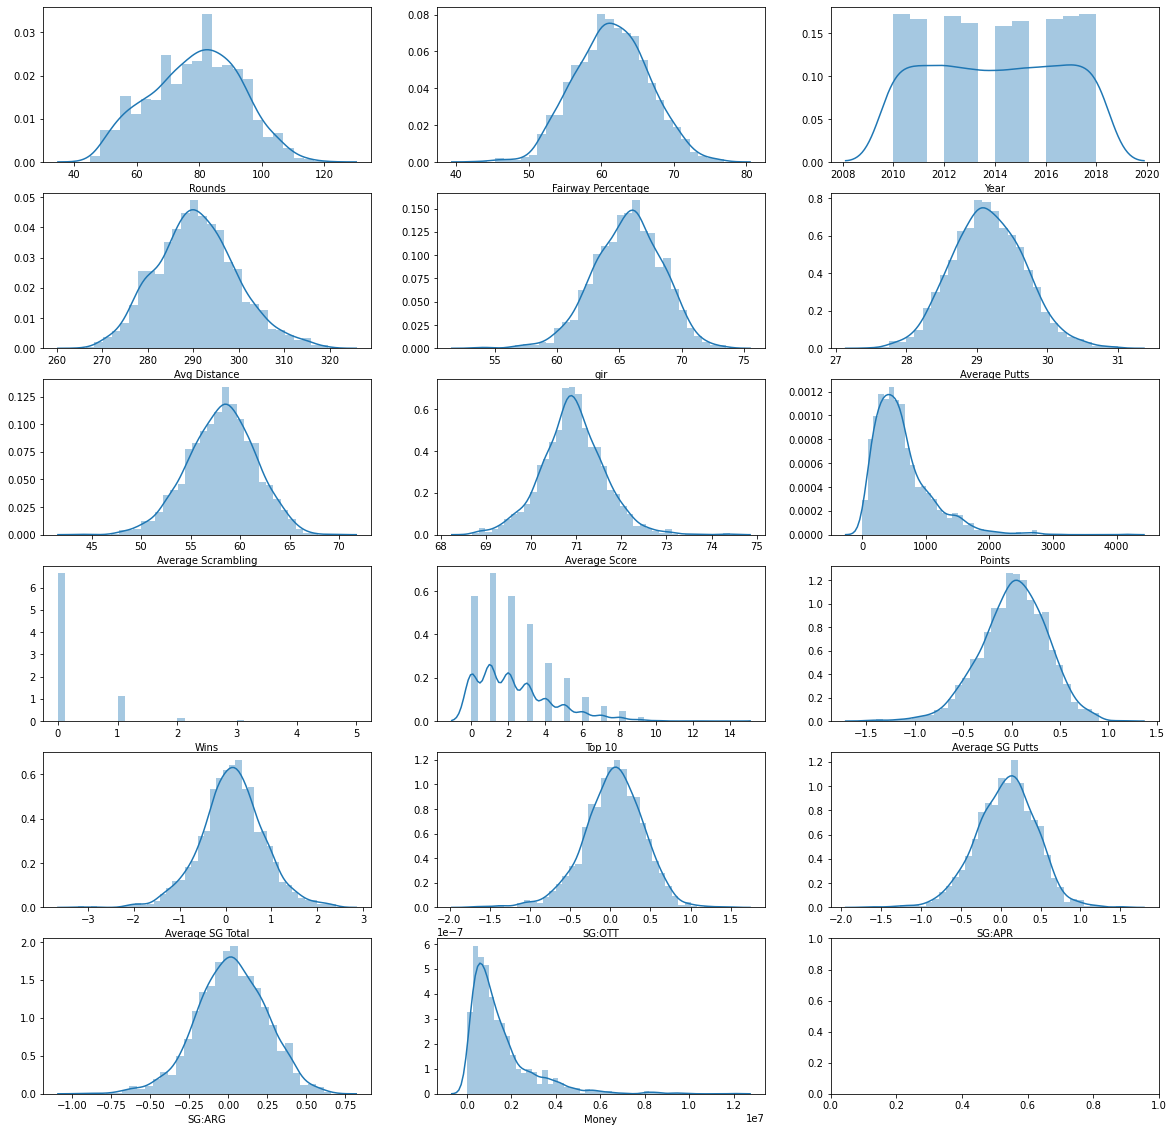

In [21]:
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = df.loc[:,df.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [22]:
win = df.groupby('Year')['Wins'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)

# Converting win into ints
win = win.astype(int)

print(win)

Wins    0   1  2  3  4  5
Year                     
2010  166  21  5  0  0  0
2011  156  25  5  0  0  0
2012  159  26  4  1  0  0
2013  152  24  3  0  0  1
2014  142  29  3  2  0  0
2015  150  29  2  1  1  0
2016  152  28  4  1  0  0
2017  156  30  0  3  1  0
2018  158  26  5  3  0  0


In [23]:
players = win.apply(lambda x: np.sum(x), axis=1)
percent_no_win = win[0]/players
percent_no_win = percent_no_win*100
print(percent_no_win)

Year
2010    86.458333
2011    83.870968
2012    83.684211
2013    84.444444
2014    80.681818
2015    81.967213
2016    82.162162
2017    82.105263
2018    82.291667
dtype: float64


Text(0.5, 1.0, 'Percentage of Players without a Win')

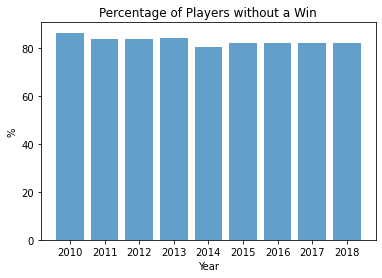

In [25]:
fig, ax = plt.subplots()
bar_width = 0.8
opacity = 0.7 
index = np.arange(2010, 2019)

plt.bar(index, percent_no_win, bar_width, alpha = opacity)
plt.xticks(index)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percentage of Players without a Win')

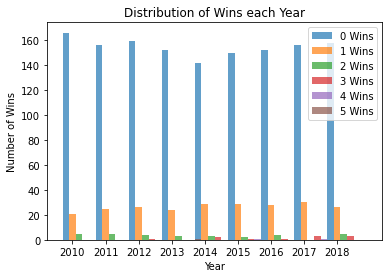

In [26]:

fig, ax = plt.subplots()
index = np.arange(2010, 2019)
bar_width = 0.2
opacity = 0.7 

def plot_bar(index, win, labels):
    plt.bar(index, win, bar_width, alpha=opacity, label=labels)

# Plotting the bars
rects = plot_bar(index, win[0], labels = '0 Wins')
rects1 = plot_bar(index + bar_width, win[1], labels = '1 Wins')
rects2 = plot_bar(index + bar_width*2, win[2], labels = '2 Wins')
rects3 = plot_bar(index + bar_width*3, win[3], labels = '3 Wins')
rects4 = plot_bar(index + bar_width*4, win[4], labels = '4 Wins')
rects5 = plot_bar(index + bar_width*5, win[5], labels = '5 Wins')

plt.xticks(index + bar_width, index)
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Distribution of Wins each Year')
plt.legend()

In [27]:
top10 = df.groupby('Year')['Top 10'].value_counts()
top10 = top10.unstack()
top10.fillna(0, inplace=True)
players = top10.apply(lambda x: np.sum(x), axis=1)

no_top10 = top10[0]/players * 100
print(no_top10)

Year
2010    17.187500
2011    25.268817
2012    23.157895
2013    18.888889
2014    16.477273
2015    18.579235
2016    20.000000
2017    15.789474
2018    17.187500
dtype: float64


In [28]:
# Who are some of the longest hitters 
distance = df[['Year','Player Name','Avg Distance']].copy()
distance.sort_values(by='Avg Distance', inplace=True, ascending=False)
print(distance.head())

      Year     Player Name  Avg Distance
162   2018    Rory McIlroy         319.7
1481  2011     J.B. Holmes         318.4
174   2018   Trey Mullinax         318.3
732   2015  Dustin Johnson         317.7
350   2017    Rory McIlroy         316.7


In [29]:
# Who made the most money
money_ranking = df[['Year','Player Name','Money']].copy()
money_ranking.sort_values(by='Money', inplace=True, ascending=False)
print(money_ranking.head())

     Year     Player Name       Money
647  2015   Jordan Spieth  12030465.0
361  2017   Justin Thomas   9921560.0
303  2017   Jordan Spieth   9433033.0
729  2015       Jason Day   9403330.0
520  2016  Dustin Johnson   9365185.0


In [30]:
# Who made the most money each year
money_rank = money_ranking.groupby('Year')['Money'].max()
money_rank = pd.DataFrame(money_rank)
print(money_rank.iloc[0,0])

indexs = np.arange(2010, 2019)
names = []
for i in range(money_rank.shape[0]):
    temp = df.loc[df['Money'] == money_rank.iloc[i,0],'Player Name']
    names.append(str(temp.values[0]))

money_rank['Player Name'] = names
print(money_rank)

4910477.0
           Money     Player Name
Year                            
2010   4910477.0     Matt Kuchar
2011   6683214.0     Luke Donald
2012   8047952.0    Rory McIlroy
2013   8553439.0     Tiger Woods
2014   8280096.0    Rory McIlroy
2015  12030465.0   Jordan Spieth
2016   9365185.0  Dustin Johnson
2017   9921560.0   Justin Thomas
2018   8694821.0   Justin Thomas


Index(['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money'],
      dtype='object')


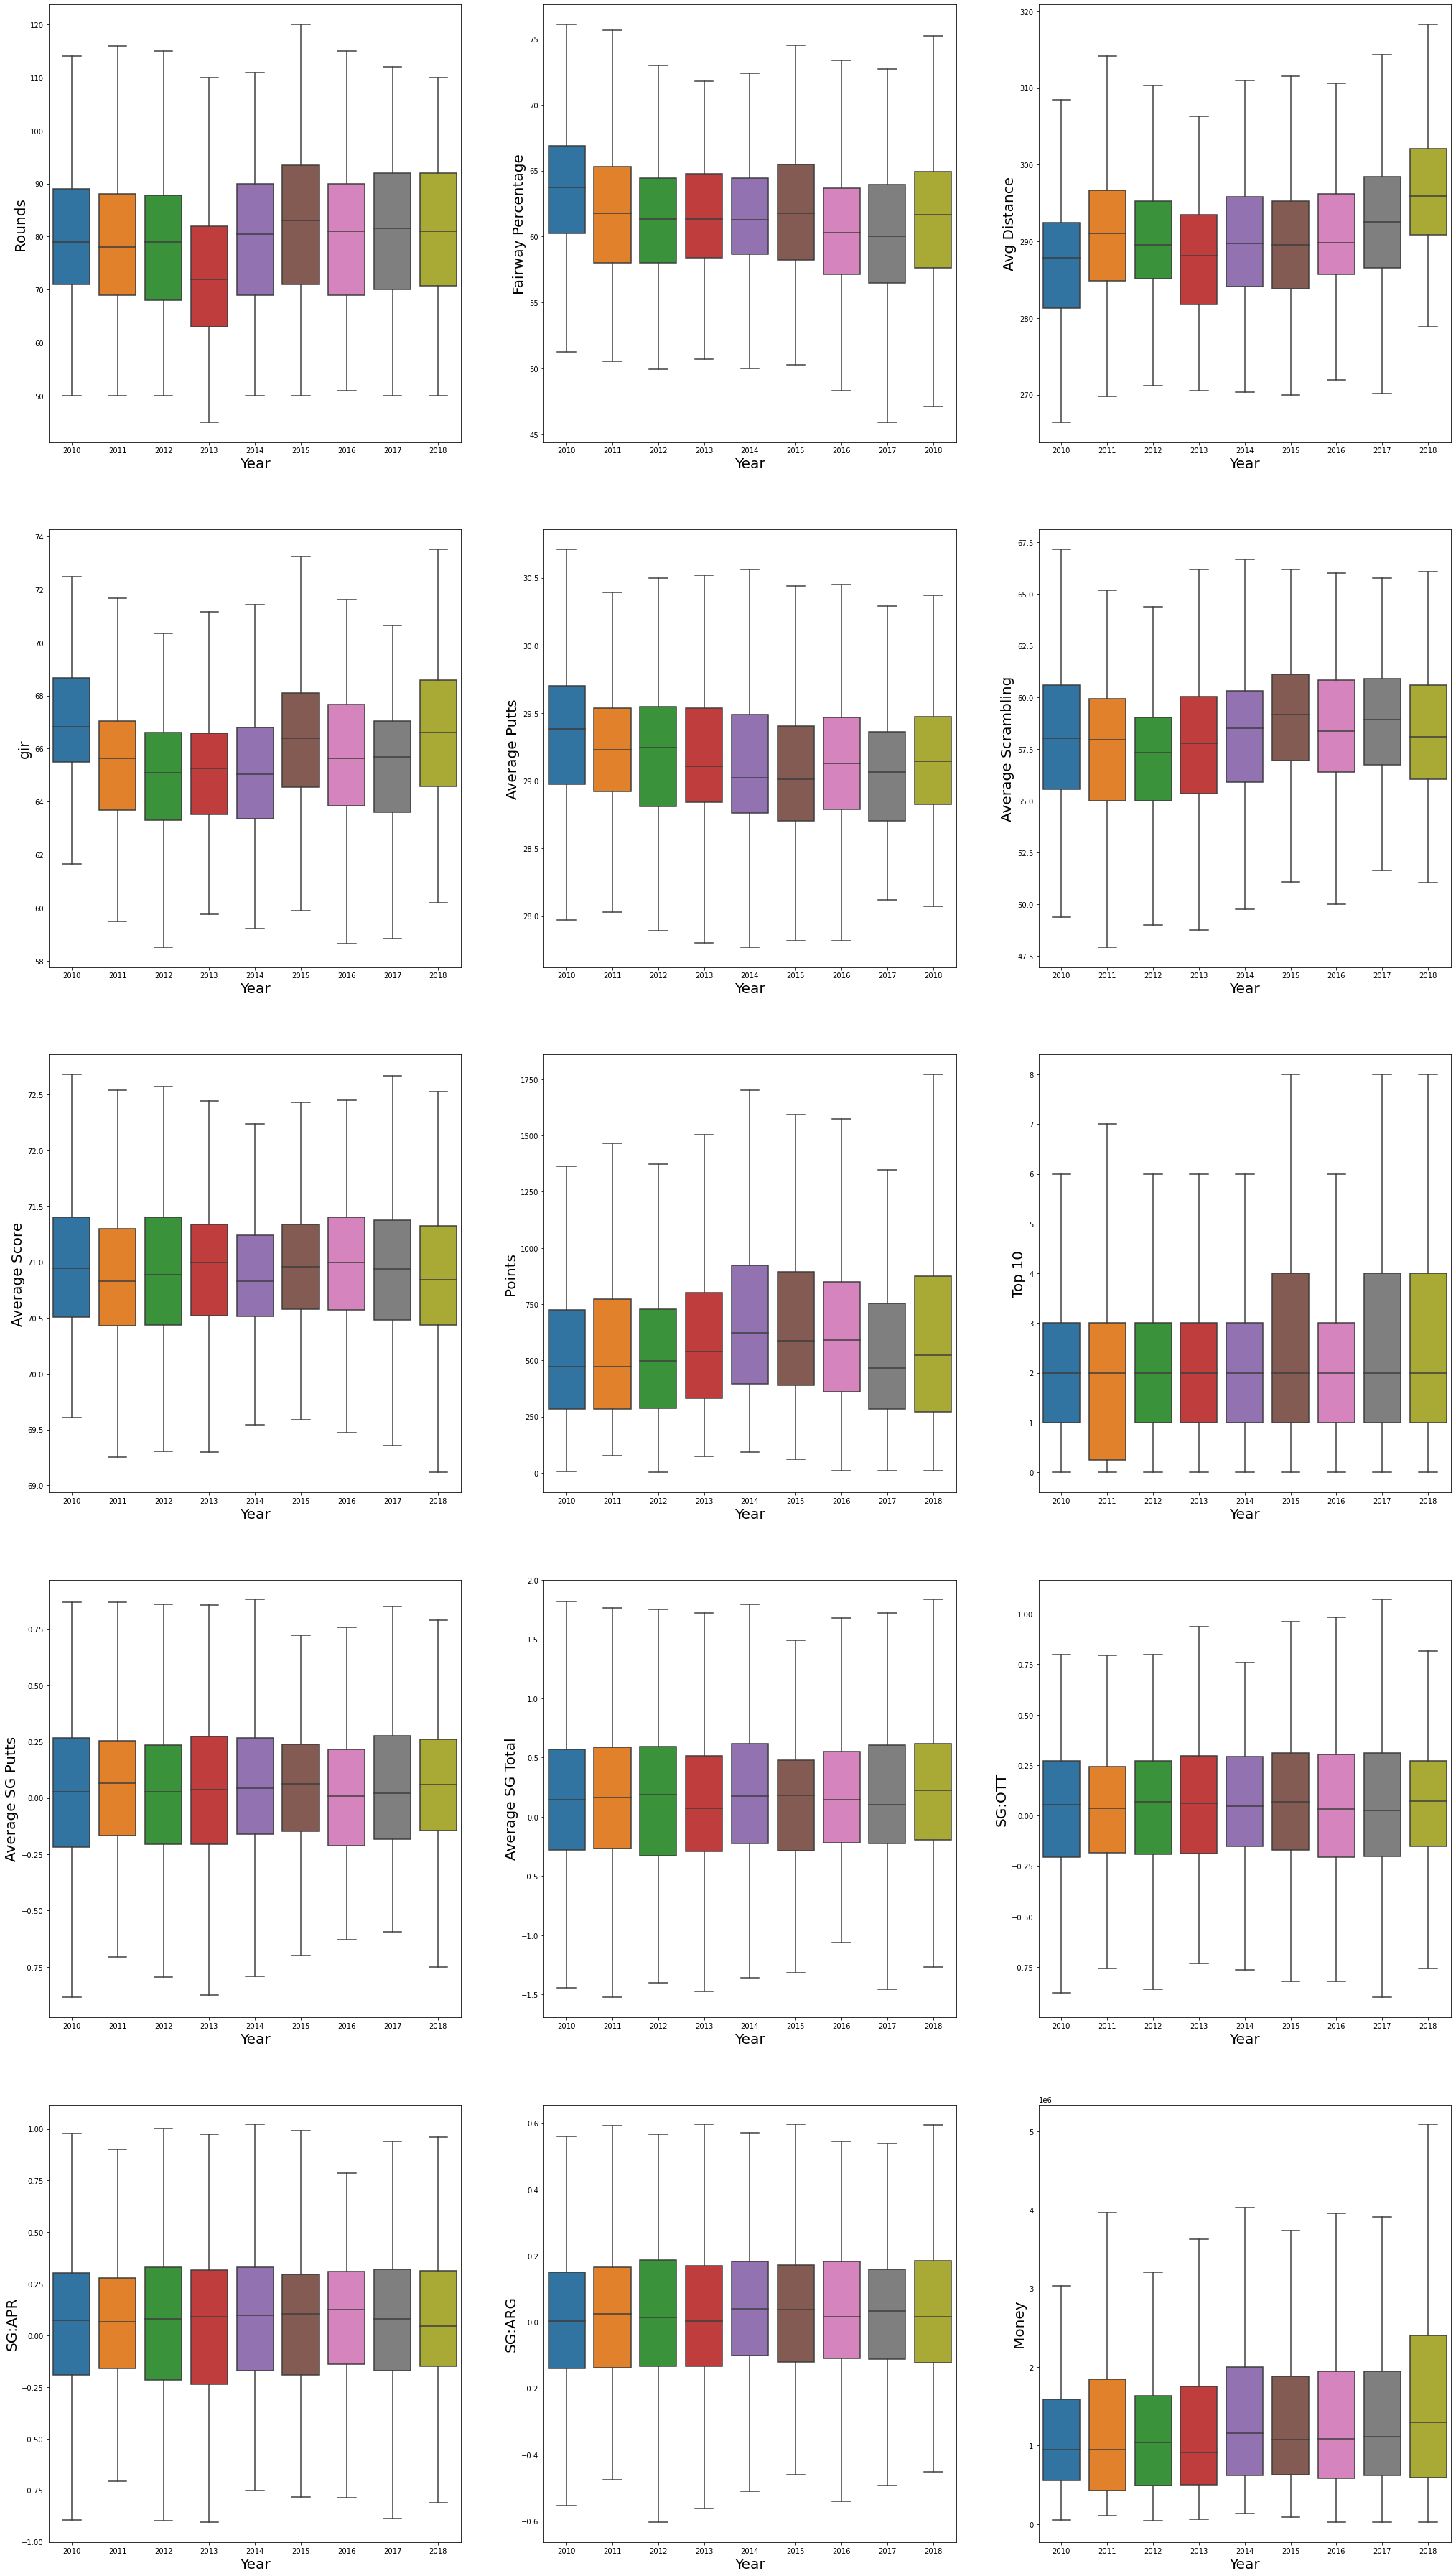

In [31]:

f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution = df.loc[:,(df.columns!='Player Name') & (df.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, data=df, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [32]:
champion = df.loc[df['Wins'] >= 1, :]
print(champion.head())

        Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
1       Ryan Armour     109               73.58  2018         283.5  68.22   
16   Billy Horschel      86               67.80  2018         295.4  71.75   
22  Ted Potter, Jr.      87               66.83  2018         286.0  63.03   
23      Austin Cook     107               66.76  2018         292.3  66.51   
27      Ian Poulter      73               66.41  2018         293.6  67.01   

    Average Putts  Average Scrambling  Average Score  Points  Wins  Top 10  \
1           29.31               60.13         70.758    1006     1       3   
16          29.46               58.03         70.154     960     1       3   
22          28.45               57.51         71.024     744     1       1   
23          28.72               62.02         70.469    1060     1       3   
27          28.97               57.11         70.593    1030     1       4   

    Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG

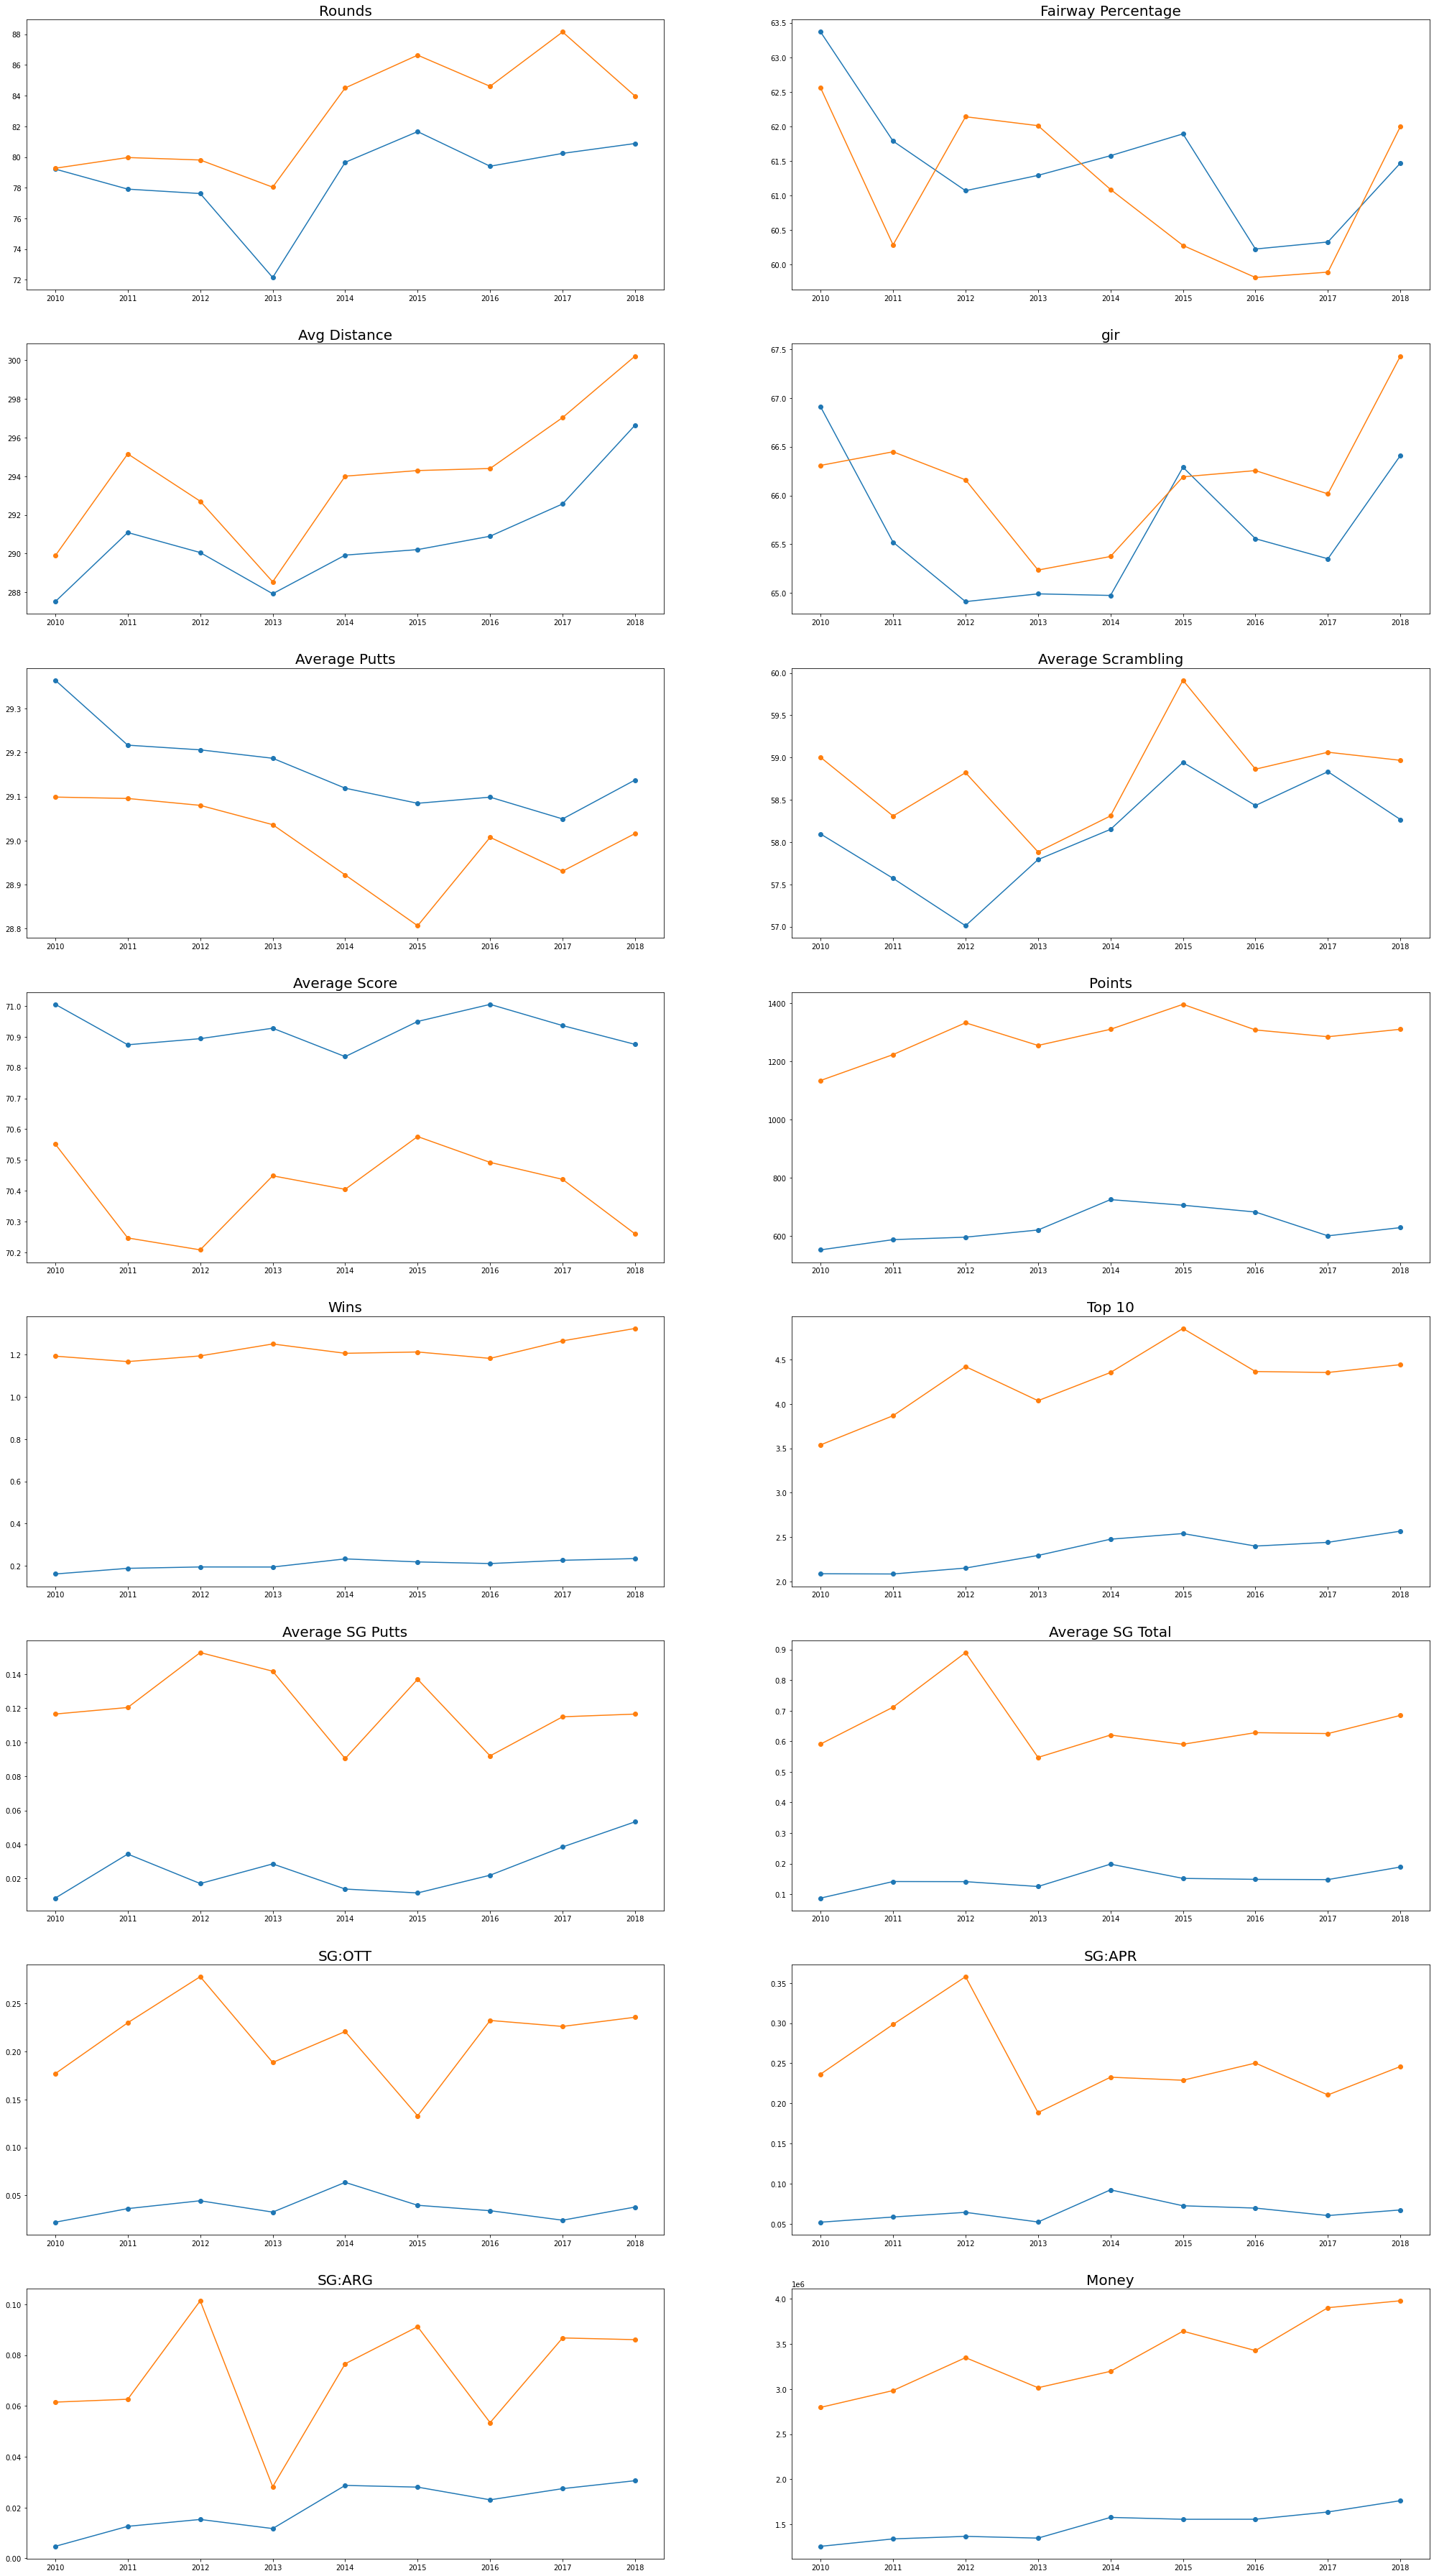

In [33]:
f, ax = plt.subplots(nrows = 8, ncols = 2, figsize=(35,65))
distribution = df.loc[:,df.columns!='Player Name'].columns
distribution = distribution[distribution != 'Year']

rows = 0
cols = 0
lower_better = ['Average Putts', 'Average Score']
for i, column in enumerate(distribution):
    avg = df.groupby('Year')[column].mean()
    best = champion.groupby('Year')[column].mean()
    ax[rows,cols].plot(avg, 'o-',)
    ax[rows,cols].plot(best, 'o-',)
    ax[rows,cols].set_title(column, fontsize = 20)
    
    cols += 1
    if cols == 2:
        cols = 0
        rows += 1

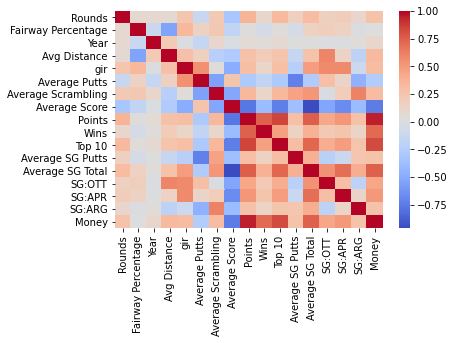

In [34]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm')

In [35]:
df.corr()['Wins']

Rounds                0.103162
Fairway Percentage   -0.047949
Year                  0.039006
Avg Distance          0.206294
gir                   0.120340
Average Putts        -0.168764
Average Scrambling    0.125193
Average Score        -0.390254
Points                0.750110
Wins                  1.000000
Top 10                0.473453
Average SG Putts      0.149155
Average SG Total      0.384932
SG:OTT                0.232414
SG:APR                0.259363
SG:ARG                0.134948
Money                 0.721665
Name: Wins, dtype: float64

In [38]:
df['Winner'] = df['Wins'].apply(lambda x: 1 if x>0 else 0)

# New DataFrame 
ml_df = df.copy()

# Y value for machine learning is the Winner column
target = df['Winner']

# Removing the columns Player Name, Wins, and Winner from the dataframe
ml_df.drop(['Player Name','Wins','Winner'], axis=1, inplace=True)
print(ml_df.head())

   Rounds  Fairway Percentage  Year  Avg Distance    gir  Average Putts  \
0      60               75.19  2018         291.5  73.51          29.93   
1     109               73.58  2018         283.5  68.22          29.31   
2      93               72.24  2018         286.5  68.67          29.12   
3      78               71.94  2018         289.2  68.80          29.17   
4     103               71.44  2018         278.9  67.12          29.11   

   Average Scrambling  Average Score  Points  Top 10  Average SG Putts  \
0               60.67         69.617     868       5            -0.207   
1               60.13         70.758    1006       3            -0.058   
2               62.27         70.432    1020       3             0.192   
3               64.16         70.015     795       5            -0.271   
4               59.23         71.038     421       3             0.164   

   Average SG Total  SG:OTT  SG:APR  SG:ARG      Money  
0             1.153   0.427   0.960  -0.027  26